# Regularization
## Implementing Linear and Logistic Regression Using Regularization

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 20,10

In [3]:
train = pd.read_table('../Dataset/Housing Prices/ex3x.dat',names=['Area','Bedrooms'],delim_whitespace=True)
y = pd.read_table('../Dataset/Housing Prices/ex3y.dat',names=['Price'],delim_whitespace=True)
print 'Shape(X) : {}'.format(train.shape)
print 'Shape(y) : {}'.format(y.shape)

Shape(X) : (47, 2)
Shape(y) : (47, 1)


In [4]:
train.head()

,Area,Bedrooms
0,2104.0,3.0
1,1600.0,3.0
2,2400.0,3.0
3,1416.0,2.0
4,3000.0,4.0


In [5]:
y.head()

,Price
0,399900.0
1,329900.0
2,369000.0
3,232000.0
4,539900.0


<IPython.core.display.Javascript object>


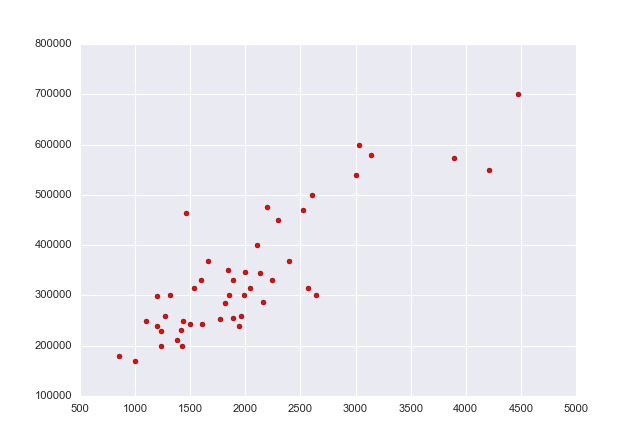

In [6]:
plt.scatter(train.iloc[:,0],y,c='r')

In [7]:
train['Area^2'] = train.Area**2
train.head()

,Area,Bedrooms,Area^2
0,2104.0,3.0,4426816.0
1,1600.0,3.0,2560000.0
2,2400.0,3.0,5760000.0
3,1416.0,2.0,2005056.0
4,3000.0,4.0,9000000.0


In [8]:
X = train.drop(['Bedrooms'],axis=1)
X.head()

,Area,Area^2
0,2104.0,4426816.0
1,1600.0,2560000.0
2,2400.0,5760000.0
3,1416.0,2005056.0
4,3000.0,9000000.0


In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
print 'Mean: {}, Standard Deviation: {}'.format(np.mean(X),np.std(X))

Mean: 5.31489745831e-17, Standard Deviation: 1.0


In [10]:
y = StandardScaler().fit(y).transform(y)
print 'Mean: {}, Standard Deviation: {}'.format(np.mean(y),np.std(y))

Mean: -6.61409461479e-17, Standard Deviation: 1.0


In [11]:
X = pd.DataFrame(X,columns=['Area','Area^2'])
X['Bias'] = np.ones((X.shape[0],))
X.head()

,Area,Area^2,Bias
0,0.131415,-0.047860,1.0
1,-0.509641,-0.508354,1.0
2,0.507909,0.281001,1.0
3,-0.743677,-0.645244,1.0
4,1.271071,1.080222,1.0


In [12]:
def J(X,y,theta,m,lamda):
    '''
        Returns the error for the 
        given value of the theta
    '''
    try:
        X,y = X.values,y.values
    except:
        pass
    error = sum((np.dot(X,theta) - y)**2) + lamda*sum((theta[1:,0])**2)
    return error/(2*m)

In [13]:
def gradient(X,y,theta,m,lamda,alpha):
    '''
        Returns the gradient for
        the given values of theta
    '''
    theta_copy = theta.copy()
    theta_copy[0] = 0.0
    grad = alpha*(np.dot(X.T,(np.dot(X,theta) - y))/m + (lamda/m)*theta_copy)
    return grad

In [14]:
theta = np.asarray([0.0,0.0,0.0]).reshape(-1,1)
m = X.shape[0]
alpha = 0.01
lamda = 0.01

In [15]:
for i in range(1000):
    print 'Cost: {}'.format(J(X,y,theta,m,lamda))
    theta = theta - gradient(X,y,theta,m,lamda,alpha)

Cost: [ 0.5]
Cost: [ 0.48588919]
Cost: [ 0.47233059]
Cost: [ 0.45930261]
Cost: [ 0.44678446]
Cost: [ 0.43475619]
Cost: [ 0.42319863]
Cost: [ 0.41209336]
Cost: [ 0.40142266]
Cost: [ 0.39116954]
Cost: [ 0.38131764]
Cost: [ 0.37185127]
Cost: [ 0.36275533]
Cost: [ 0.35401532]
Cost: [ 0.34561731]
Cost: [ 0.33754792]
Cost: [ 0.32979428]
Cost: [ 0.32234404]
Cost: [ 0.31518531]
Cost: [ 0.3083067]
Cost: [ 0.30169723]
Cost: [ 0.29534637]
Cost: [ 0.28924399]
Cost: [ 0.28338038]
Cost: [ 0.27774619]
Cost: [ 0.27233243]
Cost: [ 0.26713048]
Cost: [ 0.26213205]
Cost: [ 0.25732918]
Cost: [ 0.2527142]
Cost: [ 0.24827977]
Cost: [ 0.24401881]
Cost: [ 0.23992454]
Cost: [ 0.23599043]
Cost: [ 0.23221022]
Cost: [ 0.22857788]
Cost: [ 0.22508762]
Cost: [ 0.22173388]
Cost: [ 0.21851132]
Cost: [ 0.2154148]
Cost: [ 0.2124394]
Cost: [ 0.20958036]
Cost: [ 0.20683314]
Cost: [ 0.20419335]
Cost: [ 0.2016568]
Cost: [ 0.19921945]
Cost: [ 0.1968774]
Cost: [ 0.19462693]
Cost: [ 0.19246446]
Cost: [ 0.19038653]
Cost: [ 0.188

In [16]:
print 'Theta0: {} Theta1: {} Theta2: {}'.format(theta[0],theta[1],theta[2])

Theta0: [ 0.52463137] Theta1: [ 0.32944948] Theta2: [ -1.27007168e-16]


We observe that the value of theta2 has been decreased to almost to zero owing to the zero participation of that feature as the relationship between the response and the parameter 'Area' is linear! =)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


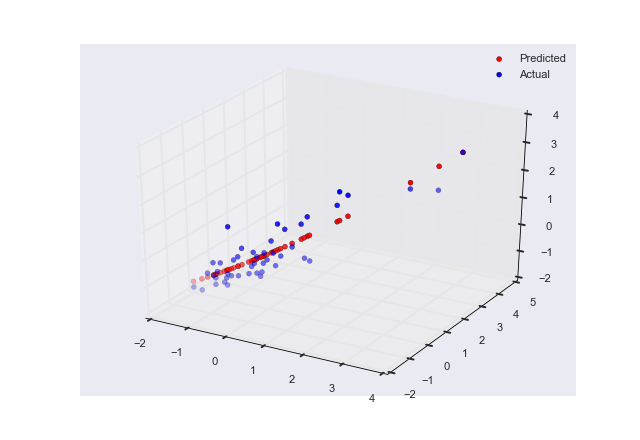

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],np.dot(X,theta)[:,0],c='r',label='Predicted')
ax.scatter(X.iloc[:,0],X.iloc[:,1],y[:,0],label='Actual')
plt.legend()

## Implementing Logistic Regression with Regularization

In [19]:
data = pd.read_csv('../Dataset/breast-cancer-wisconsin.data',names=['sample','clump thickness','cell size uniformity',\
                                                           'cell shape uniformity','marginal adhesion','epithelial cell size',\
                                                           'bare nuclei','bland chromatin','normal nucleoli','mitosis','class'])
data.head()

,sample,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [20]:
y = data.pop('class').map({2:0,4:1}).reshape(-1,1)
print y.shape

(699, 1)


In [21]:
X = data[['clump thickness']]
X.head()

,clump thickness
0,5
1,5
2,3
3,6
4,4


In [22]:
X['clump thickness^2'] = X.iloc[:,0]**2
X['bias'] = np.ones((X.shape[0],))
X.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,clump thickness,clump thickness^2,bias
0,5,25,1.0
1,5,25,1.0
2,3,9,1.0
3,6,36,1.0
4,4,16,1.0


In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [24]:
def J(X,y,theta,m,lamda):
    error = sum(np.dot(y.T,np.log(sigmoid(np.dot(X,theta)))) + np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta))))) + \
    lamda*sum(theta[1:,0]**2)
    return (-1*error)/m

In [25]:
def gradient(X,y,theta,m,lamda,alpha):
    '''
        Returns the gradient for
        the given values of theta
    '''
    theta_copy = theta.copy()
    theta_copy[0] = 0.0
    grad = alpha*(np.dot(X.T,(sigmoid(np.dot(X,theta)) - y))/m + (lamda/m)*theta_copy)
    return grad

In [26]:
theta = np.asarray([0.0,0.0,0.0]).reshape(-1,1)
m = X.shape[0]
alpha = 0.01
lamda = 0.01

In [27]:
for i in range(1000):
    print 'Cost: {}'.format(J(X,y,theta,m,lamda))
    theta = theta - gradient(X,y,theta,m,lamda,alpha)

Cost: [ 0.69314718]
Cost: [ 0.79790785]
Cost: [ 0.64936552]
Cost: [ 0.67149685]
Cost: [ 0.67232682]
Cost: [ 0.75750593]
Cost: [ 0.64214644]
Cost: [ 0.67466514]
Cost: [ 0.6565277]
Cost: [ 0.7303122]
Cost: [ 0.631701]
Cost: [ 0.66471837]
Cost: [ 0.64046574]
Cost: [ 0.70124726]
Cost: [ 0.62253608]
Cost: [ 0.65696655]
Cost: [ 0.62519703]
Cost: [ 0.67367897]
Cost: [ 0.61334437]
Cost: [ 0.64750498]
Cost: [ 0.61129596]
Cost: [ 0.64949312]
Cost: [ 0.60351105]
Cost: [ 0.63493661]
Cost: [ 0.5990039]
Cost: [ 0.62941677]
Cost: [ 0.593123]
Cost: [ 0.61997218]
Cost: [ 0.58797077]
Cost: [ 0.61238558]
Cost: [ 0.58273612]
Cost: [ 0.60448394]
Cost: [ 0.57767276]
Cost: [ 0.59695088]
Cost: [ 0.57271201]
Cost: [ 0.58961988]
Cost: [ 0.56786241]
Cost: [ 0.58252379]
Cost: [ 0.56311933]
Cost: [ 0.5756615]
Cost: [ 0.55848028]
Cost: [ 0.56903656]
Cost: [ 0.55394334]
Cost: [ 0.56265312]
Cost: [ 0.54950745]
Cost: [ 0.55651633]
Cost: [ 0.54517263]
Cost: [ 0.5506324]
Cost: [ 0.54094023]
Cost: [ 0.54500871]
Cost: [ 0

In [29]:
print 'Theta0: {}, Theta1: {}, Theta2: {}'.format(theta[0],theta[1],theta[2])

Theta0: [-1.00654901], Theta1: [ 0.19611009], Theta2: [-0.75454301]


In [40]:
yPred = sigmoid(np.dot(X,theta))
yPred = np.asarray([1 if x > 0.5 else 0 for x in yPred]).reshape(-1,1)
print yPred.shape

(699, 1)


<IPython.core.display.Javascript object>


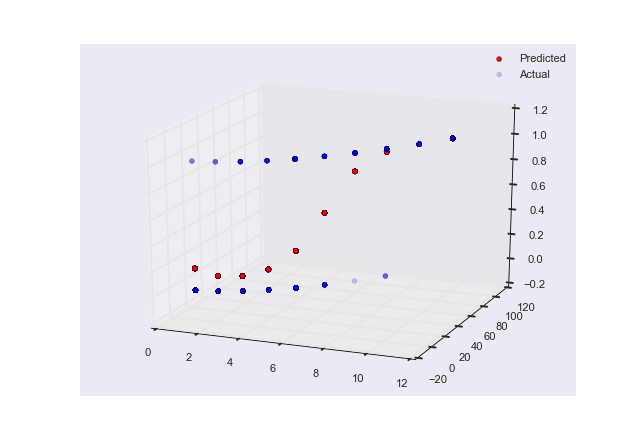

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],sigmoid(np.dot(X,theta)),c='r',label='Predicted')
ax.scatter(X.iloc[:,0],X.iloc[:,1],y[:,0],c='b',label='Actual',alpha=0.2)
plt.legend()

In [49]:
print 'Percentage Accuracy: {}%'.format(round((y == yPred).mean()*100,3))

Percentage Accuracy: 86.123%
